# Customer segmentation

This notebook is focus on exploring and cleaning the data.

## 1. Understanding the Problem

The problem is to understand the customers' preferences based on their personal information in order to help marketing departments to improve level sales by specializing advertisements to smaller client groups. 

There are four segments:

* A
* B
* C
* D

## 2. Data Understanding

Structure of the data:

* **Features**:
  * **ID**: Unique ID
  * **Gender**: Gender
  * **Ever_Married**: Marital status of the customer
  * **Age**: Age
  * **Graduated**: Is the customer a graduate?
  * **Profession**: Profession of the customer
  * **Work_Experience**: Work Experience in years
  * **Spending_Score**: Spending Score
  * **Family_Size**: Family Size
  * **Var_1**: Category for the customer
* **Target variable**:
  * **Segmentation**: Customer Segment of the customer

Link: <https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation>

## 3. Data exploration

### 3.1. Review the state of the data

This is a first glance over the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
plt.style.use('ggplot')

In [3]:
PATH_DATA = os.path.join(os.getenv("PATH_DATA_PROJECTS"), "Tabular", "customer_segmentation")

In [4]:
df_train = pd.read_csv(os.path.join(PATH_DATA, "train.csv"))
print("Shape:", df_train.shape)
df_train.head()

Shape: (8068, 11)


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [6]:
print("Total missing by columns:")
df_train.isnull().sum()

Total missing by columns:


ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

#### 3.1.1. Categorical

In [7]:
categorical_features = ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1"]

In [8]:
for c in categorical_features:
    print("\nFeature:", c)
    print(df_train[c].unique())


Feature: Gender
['Male' 'Female']

Feature: Ever_Married
['No' 'Yes' nan]

Feature: Graduated
['No' 'Yes' nan]

Feature: Profession
['Healthcare' 'Engineer' 'Lawyer' 'Entertainment' 'Artist' 'Executive'
 'Doctor' 'Homemaker' 'Marketing' nan]

Feature: Spending_Score
['Low' 'Average' 'High']

Feature: Var_1
['Cat_4' 'Cat_6' 'Cat_7' 'Cat_3' 'Cat_1' 'Cat_2' nan 'Cat_5']


#### 3.1.2. Numeric

In [9]:
numeric_features = ["Age", "Work_Experience", "Family_Size"]
df_train[numeric_features].describe()

,Age,Work_Experience,Family_Size
count,8068.000000,7239.000000,7733.000000
mean,43.466906,2.641663,2.850123
std,16.711696,3.406763,1.531413
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


#### 3.1.3. Target variable

In [10]:
target_variable = "Segmentation"
df_train[target_variable].unique()

array(['D', 'A', 'B', 'C'], dtype=object)

#### 3.1.4. Conclusion

* There are missing values.
* The categorical features have few classes per feature.
* The numeric features are in different scales.
* According to data source information, the feature ID is unique, so it does not help for training. It is necessary to remove it.
* The target variable has four classes.

### 3.2. Data cleaning

Based on initial conclusions, it is necessary to apply data cleaning.

#### 3.2.1. Categorical

Replace missing values with most frequent classes.

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
si = SimpleImputer(strategy = "most_frequent")
ar = si.fit_transform(df_train[categorical_features])
df_train_Categorical = pd.DataFrame(ar, columns = categorical_features)

for f in categorical_features:
    df_train[f] = df_train_Categorical[f]

df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


#### 3.2.2. Numeric

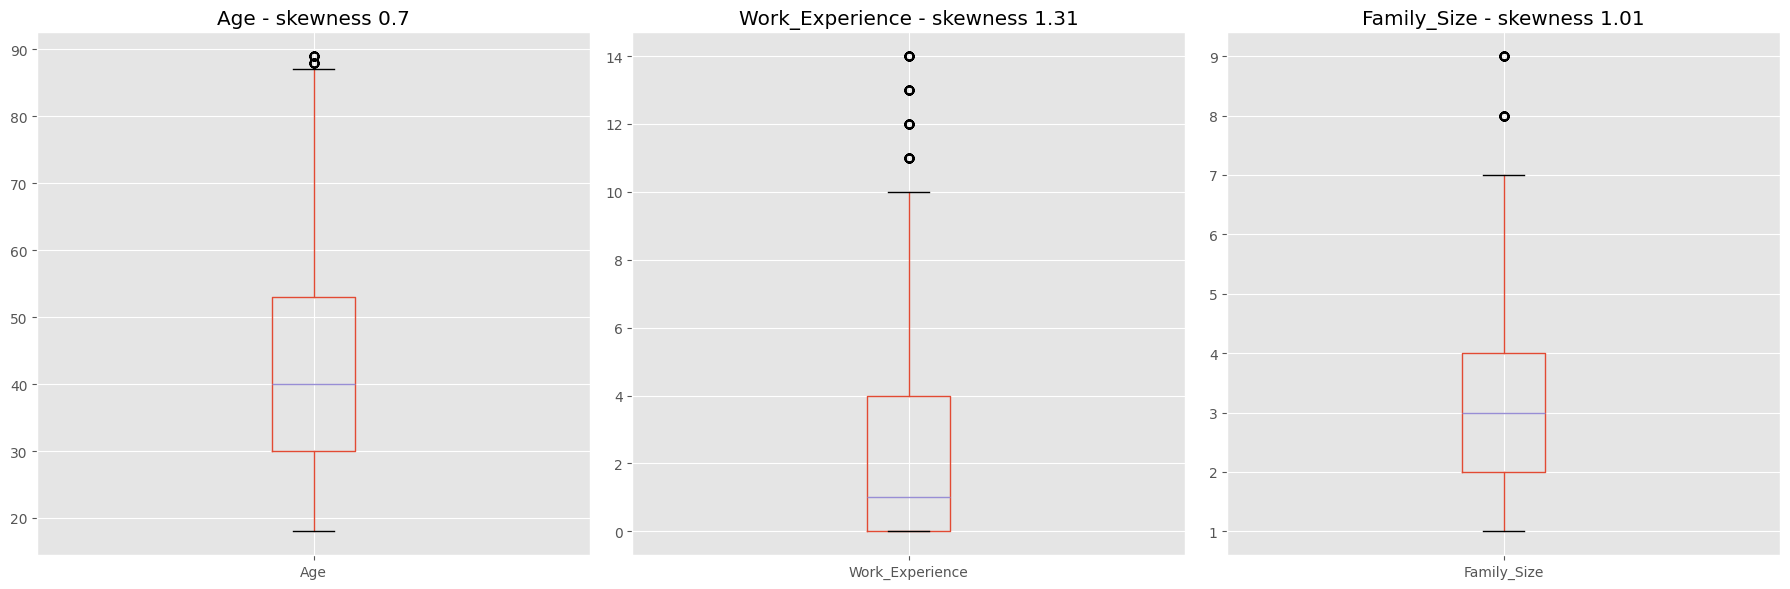

In [13]:
fig, axes = plt.subplots(1, 3, figsize = (18, 6))

for ax, f in zip(axes, numeric_features):
    df_train.boxplot(column = f, ax = ax)
    ax.set_title(f"{f} - skewness {df_train[f].skew().round(2)}")

plt.tight_layout()
plt.show()

In [14]:
for f in numeric_features:
    df_train[f] = df_train[f].fillna(df_train[f].median())

print("Total missing by columns:")
df_train[numeric_features].isnull().sum()

Total missing by columns:


Age                0
Work_Experience    0
Family_Size        0
dtype: int64

In [15]:
print("Total missing by columns:")
df_train.isnull().sum()

Total missing by columns:


ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

### 3.3. Exploratory Data Analysis (EDA)

Explore the data distribucion.

#### 3.3.1. Categorical

In [16]:
from scipy.stats import chi2_contingency

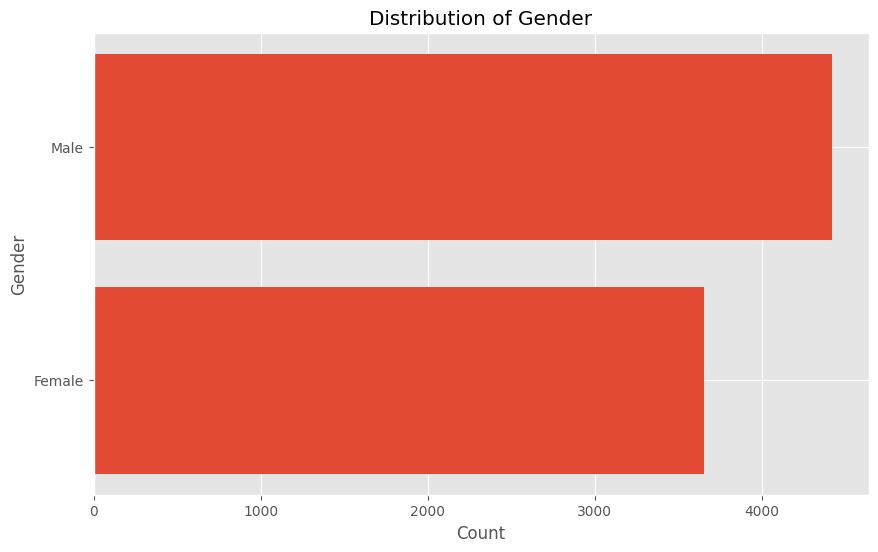

In [17]:
gender_count = df_train["Gender"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(gender_count.index, gender_count.values)
plt.xlabel("Count")
plt.ylabel("Gender")
plt.title("Distribution of Gender")
plt.gca().invert_yaxis()
plt.show()

In [18]:
contingency_table = pd.crosstab(df_train["Gender"], df_train[target_variable])
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print(f"Reject the null hypothesis: There is a significant association between Gender and {target_variable}.")
else:
    print(f"Fail to reject the null hypothesis: No significant association between Gender and {target_variable}.")

Reject the null hypothesis: There is a significant association between Gender and Segmentation.


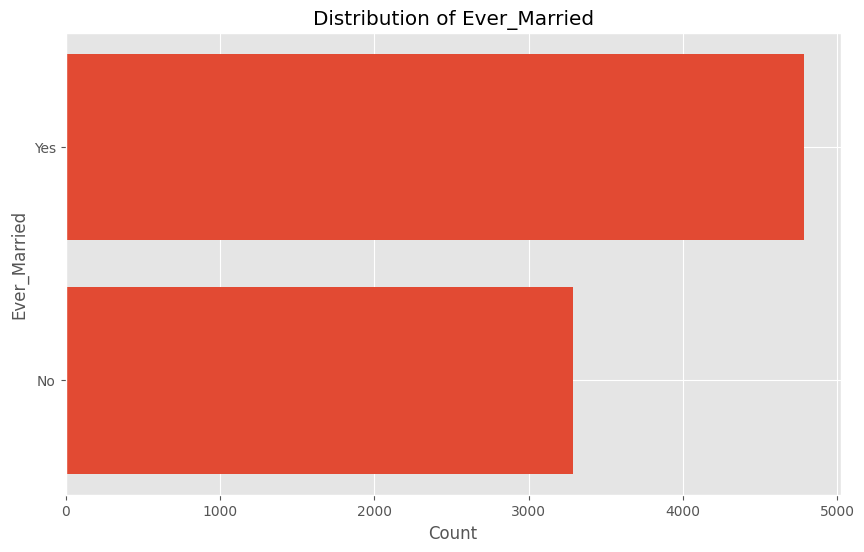

In [19]:
ever_married_count = df_train["Ever_Married"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(ever_married_count.index, ever_married_count.values)
plt.xlabel("Count")
plt.ylabel("Ever_Married")
plt.title("Distribution of Ever_Married")
plt.gca().invert_yaxis()
plt.show()

In [20]:
contingency_table = pd.crosstab(df_train["Ever_Married"], df_train[target_variable])
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print(f"Reject the null hypothesis: There is a significant association between Ever_Married and {target_variable}.")
else:
    print(f"Fail to reject the null hypothesis: No significant association between Ever_Married and {target_variable}.")

Reject the null hypothesis: There is a significant association between Ever_Married and Segmentation.


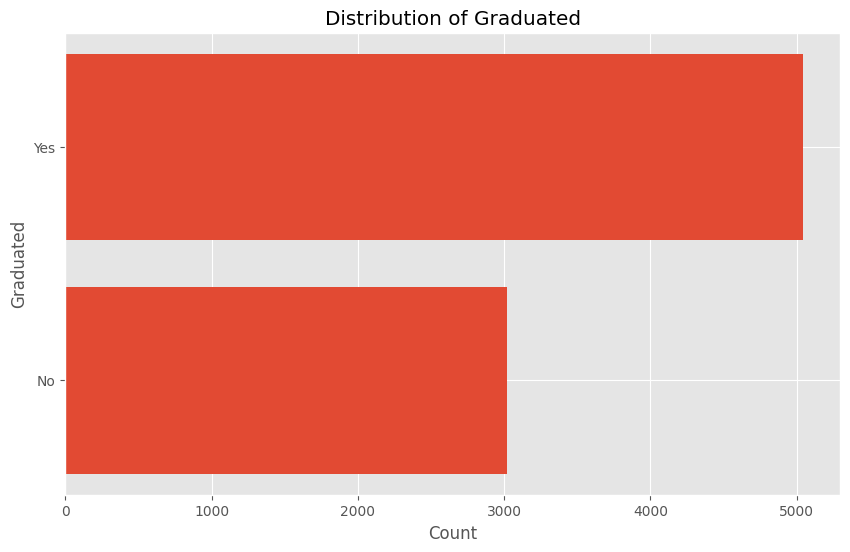

In [21]:
graduated_count = df_train["Graduated"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(graduated_count.index, graduated_count.values)
plt.xlabel("Count")
plt.ylabel("Graduated")
plt.title("Distribution of Graduated")
plt.gca().invert_yaxis()
plt.show()

In [22]:
contingency_table = pd.crosstab(df_train["Graduated"], df_train[target_variable])
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print(f"Reject the null hypothesis: There is a significant association between Graduated and {target_variable}.")
else:
    print(f"Fail to reject the null hypothesis: No significant association between Graduated and {target_variable}.")

Reject the null hypothesis: There is a significant association between Graduated and Segmentation.


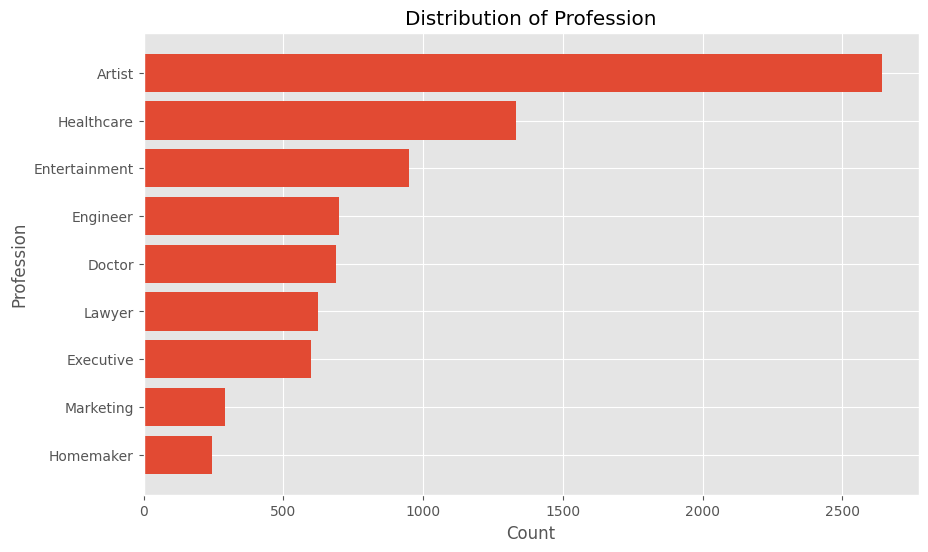

In [23]:
profession_count = df_train["Profession"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(profession_count.index, profession_count.values)
plt.xlabel("Count")
plt.ylabel("Profession")
plt.title("Distribution of Profession")
plt.gca().invert_yaxis()
plt.show()

In [24]:
contingency_table = pd.crosstab(df_train["Profession"], df_train[target_variable])
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print(f"Reject the null hypothesis: There is a significant association between Profession and {target_variable}.")
else:
    print(f"Fail to reject the null hypothesis: No significant association between Profession and {target_variable}.")

Reject the null hypothesis: There is a significant association between Profession and Segmentation.


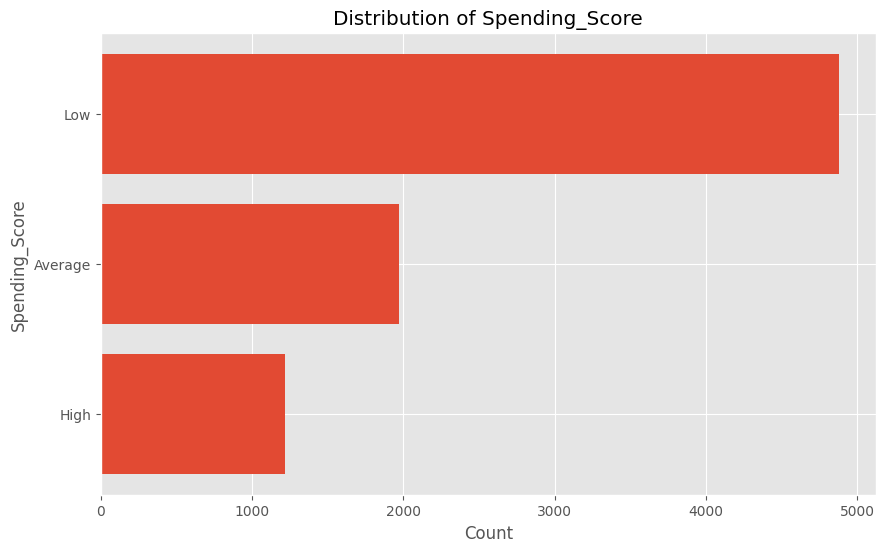

In [25]:
spending_score_count = df_train["Spending_Score"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(spending_score_count.index, spending_score_count.values)
plt.xlabel("Count")
plt.ylabel("Spending_Score")
plt.title("Distribution of Spending_Score")
plt.gca().invert_yaxis()
plt.show()

In [26]:
contingency_table = pd.crosstab(df_train["Spending_Score"], df_train[target_variable])
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print(f"Reject the null hypothesis: There is a significant association between Spending_Score and {target_variable}.")
else:
    print(f"Fail to reject the null hypothesis: No significant association between Spending_Score and {target_variable}.")

Reject the null hypothesis: There is a significant association between Spending_Score and Segmentation.


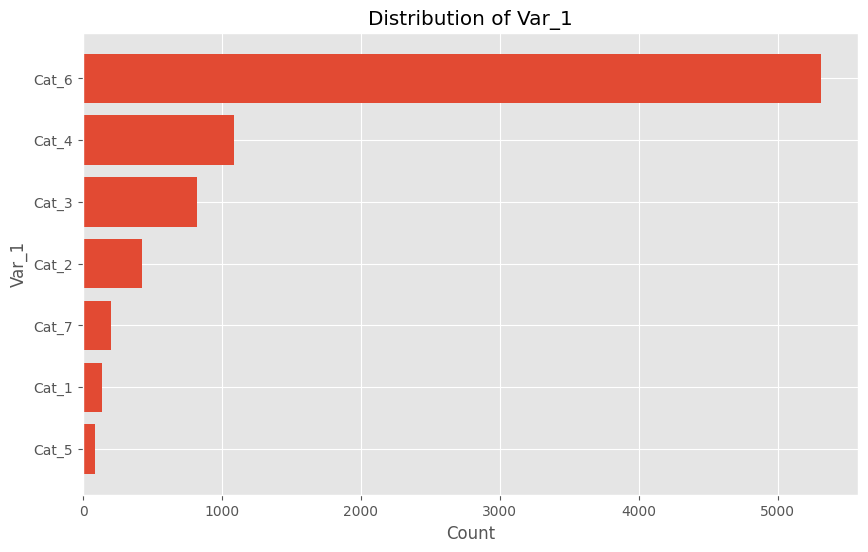

In [27]:
var_1_count = df_train["Var_1"].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(var_1_count.index, var_1_count.values)
plt.xlabel("Count")
plt.ylabel("Var_1")
plt.title("Distribution of Var_1")
plt.gca().invert_yaxis()
plt.show()

In [28]:
contingency_table = pd.crosstab(df_train["Var_1"], df_train[target_variable])
chi2, p, dof, expected = chi2_contingency(contingency_table)
if p < 0.05:
    print(f"Reject the null hypothesis: There is a significant association between Var_1 and {target_variable}.")
else:
    print(f"Fail to reject the null hypothesis: No significant association between Var_1 and {target_variable}.")

Reject the null hypothesis: There is a significant association between Var_1 and Segmentation.


#### 3.3.2. Numerical

Explore data correlation.

In [29]:
df_train[numeric_features].describe()

,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,8068.000000
mean,43.466906,2.472980,2.856346
std,16.711696,3.265248,1.499577
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,40.000000,1.000000,3.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


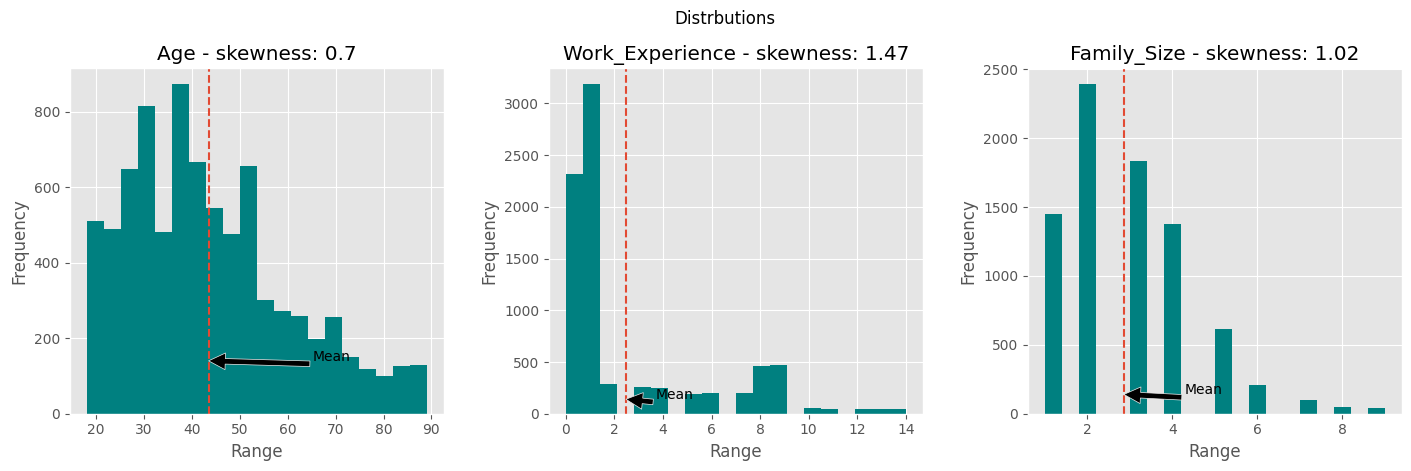

In [30]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
fig.tight_layout(pad = 4.5)
fig.suptitle("Distrbutions")

for ax, f in zip(axes, numeric_features):
    ax.hist(df_train[f], bins = 20, color = "teal")
    ax.set_title(f"{f} - skewness: {df_train[f].skew().round(2)}")
    ax.set_ylabel("Frequency")
    ax.set_xlabel("Range")
    ax.axvline(x = df_train[f].mean(), linestyle = "dashed")
    ax.annotate("Mean", xy = (df_train[f].mean(), 140), xytext=(df_train[f].mean()*1.5, 140), arrowprops = dict(facecolor = "black"))
    
plt.show()

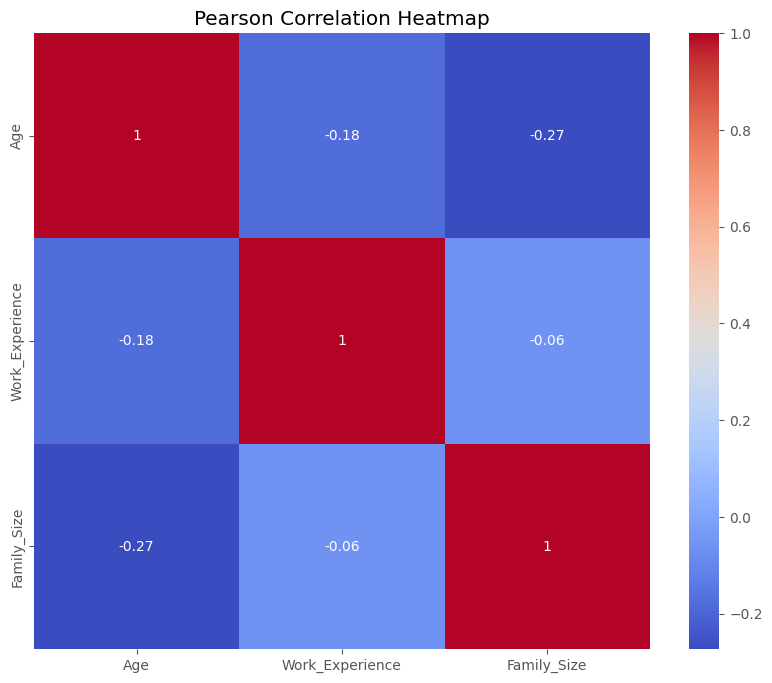

In [31]:
correlation_matrix = df_train[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", square = True)
plt.title("Pearson Correlation Heatmap")
plt.show()

#### 3.3.3. Target variable

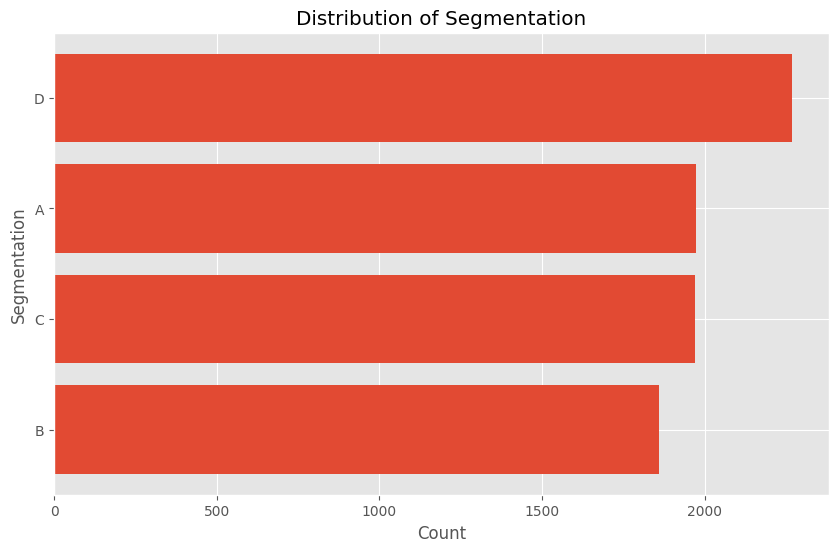

In [32]:
segmentation_count = df_train[target_variable].value_counts()

plt.figure(figsize = (10, 6))
plt.barh(segmentation_count.index, segmentation_count.values)
plt.xlabel("Count")
plt.ylabel("Segmentation")
plt.title("Distribution of Segmentation")
plt.gca().invert_yaxis()
plt.show()

#### 3.3.4. Conclusion

* **For categorical features**:
  * Classes are not equally distributed, so there is a imbalance class problem.
  * All features have a significant association with target variable, so none of them should be removed.
* **For numerica features**:
  * There is no a strong correlation among variables. So, none of them should be removed because of redundancy.
  * All have a skew distribution, so the best option to fill missing values was the median.
* **For target variable**:
  * Classes are not equally distributed, so there is a imbalance class problem.

#### 3.3.5. Save file

In [33]:
path_csv_clean = "train_cleaned.csv"
df_train.drop(["ID"], axis = 1, inplace = True)
df_train.to_csv(os.path.join(PATH_DATA, path_csv_clean), index = False)